<a href="https://colab.research.google.com/github/mehul2409/Detecting-Pneumonia/blob/main/Pneumonia_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_USERNAME']="leolaksh"
os.environ['KAGGLE_KEY']="57ed232dc629fc0d17b85b28c854cbf3"

In [ ]:
!kaggle datasets download --force paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [01:48<00:00, 20.4MB/s]
100% 2.29G/2.29G [01:48<00:00, 22.7MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
len(os.listdir('chest_xray/train/NORMAL'))

1341

In [ ]:
len(os.listdir('chest_xray/train/PNEUMONIA'))

3875

In [ ]:
import cv2
import matplotlib.pyplot as pl
import numpy as np

In [ ]:
img = cv2.imread('chest_xray/train/NORMAL/IM-0125-0001.jpeg')

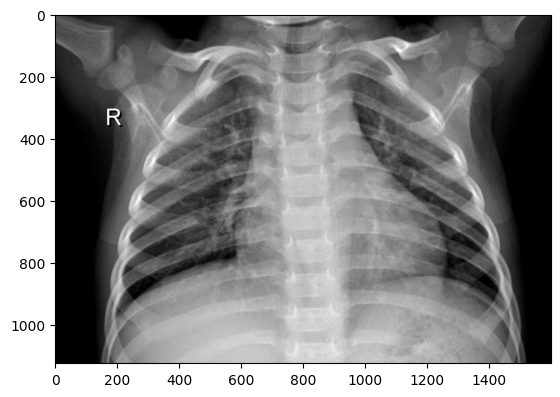

In [ ]:
pl.imshow(img)

In [ ]:
img.shape
nmofNmlimg = os.listdir('/content/chest_xray/train/NORMAL')
len(nmofNmlimg)
path="/content/chest_xray/train/NORMAL" + nmofNmlimg[0]
path

'/content/chest_xray/train/NORMALNORMAL2-IM-0694-0001.jpeg'

In [ ]:
def loadImages(path, nmofNmlimg, target):
  images=[]
  labels=[]

  for i in range(len(nmofNmlimg)):
    img_path = path + '/' + nmofNmlimg[i]
    imgs=cv2.imread(img_path)
    imgs = imgs / 255.0
    imgs = cv2.resize(imgs, (100, 100))
    images.append(imgs)
    labels.append(target)
  images = np.asarray(images)
  return images, labels


In [ ]:
Nm_path='/content/chest_xray/train/NORMAL'
Nml_img_Name=os.listdir(Nm_path)
normalImages, normalTargets = loadImages(Nm_path, Nml_img_Name, 0)

In [ ]:
pnmia_path='/content/chest_xray/train/PNEUMONIA'
pnmia_img_name=os.listdir(pnmia_path)
pnmiaImages, pnmiaTargets = loadImages(pnmia_path, pnmia_img_name, 1)

In [ ]:
normalImages = np.asarray(normalImages)
pnmiaImages = np.asarray(pnmiaImages)

In [ ]:
normalImages.shape

(1341, 100, 100, 3)

In [ ]:
pnmiaImages.shape

(3875, 100, 100, 3)

In [ ]:
normalImages[0]

array([[[0.05523529, 0.05523529, 0.05523529],
        [0.17392157, 0.17392157, 0.17392157],
        [0.25147255, 0.25147255, 0.25147255],
        ...,
        [0.52135392, 0.52135392, 0.52135392],
        [0.55036529, 0.55036529, 0.55036529],
        [0.58776882, 0.58776882, 0.58776882]],

       [[0.03992157, 0.03992157, 0.03992157],
        [0.1772549 , 0.1772549 , 0.1772549 ],
        [0.26933039, 0.26933039, 0.26933039],
        ...,
        [0.5161598 , 0.5161598 , 0.5161598 ],
        [0.5836449 , 0.5836449 , 0.5836449 ],
        [0.41506392, 0.41506392, 0.41506392]],

       [[0.04443235, 0.04443235, 0.04443235],
        [0.17288529, 0.17288529, 0.17288529],
        [0.26863235, 0.26863235, 0.26863235],
        ...,
        [0.53695588, 0.53695588, 0.53695588],
        [0.6244402 , 0.6244402 , 0.6244402 ],
        [0.37472353, 0.37472353, 0.37472353]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [ ]:
data=np.r_[normalImages, pnmiaImages]

In [ ]:
data.shape

(5216, 100, 100, 3)

In [ ]:
targets=np.r_[normalTargets, pnmiaTargets]

In [ ]:
targets.shape

(5216,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [ ]:
model = Sequential([
    Conv2D( 16, 3, input_shape=(100, 100, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu'),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 19, 19, 64)        3

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))

Epoch 1/10
123/123 [==============================] - 14s 20ms/step - loss: 0.4825 - accuracy: 0.7748 - val_loss: 0.3997 - val_accuracy: 0.8666
Epoch 2/10
123/123 [==============================] - 2s 13ms/step - loss: 0.2556 - accuracy: 0.8924 - val_loss: 0.1954 - val_accuracy: 0.9187
Epoch 3/10
123/123 [==============================] - 2s 14ms/step - loss: 0.1636 - accuracy: 0.9379 - val_loss: 0.1590 - val_accuracy: 0.9348
Epoch 4/10
123/123 [==============================] - 1s 11ms/step - loss: 0.1225 - accuracy: 0.9558 - val_loss: 0.1107 - val_accuracy: 0.9594
Epoch 5/10
123/123 [==============================] - 1s 11ms/step - loss: 0.0921 - accuracy: 0.9655 - val_loss: 0.0842 - val_accuracy: 0.9624
Epoch 6/10
123/123 [==============================] - 1s 11ms/step - loss: 0.0746 - accuracy: 0.9729 - val_loss: 0.0892 - val_accuracy: 0.9640
Epoch 7/10
123/123 [==============================] - 1s 10ms/step - loss: 0.0610 - accuracy: 0.9762 - val_loss: 0.0760 - val_accuracy: 0.972

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classification report: \n', classification_report(y_test,y_pred_classes))


41/41 [==============================] - 0s 4ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.26      1.00      0.41       337
           1       0.00      0.00      0.00       967

    accuracy                           0.26      1304
   macro avg       0.13      0.50      0.21      1304
weighted avg       0.07      0.26      0.11      1304



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.evaluate(x_test, y_test)

41/41 [==============================] - 0s 5ms/step - loss: 0.0657 - accuracy: 0.9770


[0.06571963429450989, 0.9769938588142395]

In [ ]:
y_pred

array([[0.999265  ],
       [0.99999595],
       [0.9994512 ],
       ...,
       [0.00654001],
       [0.99999285],
       [0.9998994 ]], dtype=float32)

In [ ]:
y_test

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
y_pred1=[]
for i in y_pred:
  if i>=0.5:
    y_pred1.append(1)
  else:
    y_pred1.append(0)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(y_test,y_pred1)
cm

array([[326,  11],
       [ 19, 948]])

In [ ]:
pl.plot(model.history.history['accuracy'], label = 'Training Accuracy')
pl.plot(model.history.history['val_accuracy'], label = 'Test Accuracy')
pl.title('model accuracy')
pl.ylabel('accuracy')
pl.xlabel('epoch')
pl.legend()
pl.show()

In [ ]:
pl.plot(model.history.history['loss'], label = 'Training loss')
pl.plot(model.history.history['val_loss'], label = 'Test loss')
pl.title('model loss')
pl.ylabel('loss')
pl.xlabel('epoch')
pl.legend()
pl.show()

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    pl.plot(fpr, tpr)
    pl.xlabel('False Positive Rate')
    pl.ylabel('True Positive Rate')

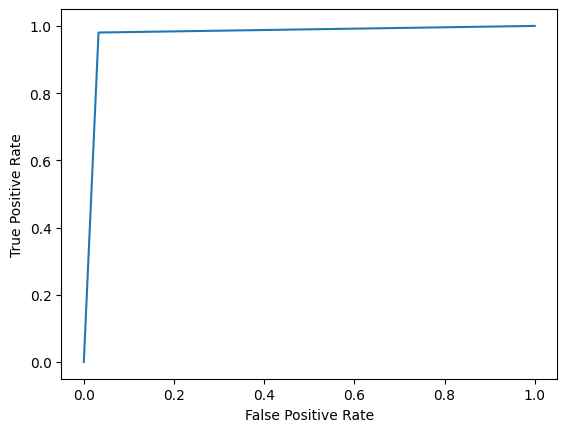

In [ ]:
plot_roc_curve(y_test,y_pred1)

In [ ]:
roc_auc_score(y_test,y_pred1)

0.9738553266703285